In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-data-analysis/manager_survey_data.csv
/kaggle/input/employee-data-analysis/employee_survey_data.csv
/kaggle/input/employee-data-analysis/general_data.csv


# Loading the Datasets

In [2]:
df1=pd.read_csv('/kaggle/input/employee-data-analysis/manager_survey_data.csv')
df2=pd.read_csv('/kaggle/input/employee-data-analysis/employee_survey_data.csv')
df3=pd.read_csv('/kaggle/input/employee-data-analysis/general_data.csv')

In [3]:
df1.head(2)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [4]:
df2.head(2)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


In [5]:
df3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


<div class="alert alert-block alert-info" style="color:#942392;font-size: 20px;"> 📌 Merging df1 and df2 on EmployeeID.📌</div>

In [6]:
df1=df1.merge(df2,on='EmployeeID')

In [7]:
df1.head(2)

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,3,3.0,4.0,2.0
1,2,2,4,3.0,2.0,4.0


<div class="alert alert-block alert-info" style="color:#942392;font-size: 20px;"> 📌 Now we will merge df1 with df3 on EmployeeID, this will be our main dataset.📌</div>

In [8]:
main_df=df1.merge(df3,on='EmployeeID')

In [9]:
main_df.sample(2)

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3449,3450,3,4,4.0,2.0,2.0,37,No,Travel_Rarely,Research & Development,...,3.0,Y,23,8,0,8.0,6,4,0,1
2461,2462,3,3,2.0,2.0,3.0,29,Yes,Travel_Rarely,Sales,...,1.0,Y,13,8,0,2.0,3,2,2,2


In [10]:
main_df.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<div class="alert alert-block alert-info" style="color:#942392;font-size: 20px;"> 📌 I did EDA on this dataset and found that EmployeeID, EmployeeCount, Over18, StandardHours these are not useful for our model building part.📌</div>

In [11]:
main_df.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours'],inplace=True,axis=1)

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JobInvolvement           4410 non-null   int64  
 1   PerformanceRating        4410 non-null   int64  
 2   EnvironmentSatisfaction  4385 non-null   float64
 3   JobSatisfaction          4390 non-null   float64
 4   WorkLifeBalance          4372 non-null   float64
 5   Age                      4410 non-null   int64  
 6   Attrition                4410 non-null   object 
 7   BusinessTravel           4410 non-null   object 
 8   Department               4410 non-null   object 
 9   DistanceFromHome         4410 non-null   int64  
 10  Education                4410 non-null   int64  
 11  EducationField           4410 non-null   object 
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

In [13]:
main_df.isnull().sum()

JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

<div class="alert alert-block alert-info" style="color:#942392;font-size: 18px;"> 📌 There are some missing values in the EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance and NumCompaniesWorked columns. We will impute these in our Preprocessor Pipeline📌</div>

# Importing Nescessery Libraries for Preprocessing

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Encoding the Target/Dependent Column

In [15]:
le=LabelEncoder()
main_df['Attrition']=le.fit_transform(main_df['Attrition'])

# Separating Dependent and Independent Variables

In [16]:
y=main_df['Attrition']
X=main_df.drop(columns=['Attrition'])

In [17]:
new_df=main_df.copy()
main_df.drop(columns=['Attrition'],inplace=True)

In [18]:
main_df.shape

(4410, 24)

In [19]:
print('shape of x is:',X.shape)
print('shape of y is:',y.shape)

shape of x is: (4410, 24)
shape of y is: (4410,)


<div class="alert alert-block alert-info" style="color:#942392;font-size: 20px;"> 📌 Separating Numerical and Categorical Columns for Preprocessing.📌</div>

In [20]:
categorical_columns= [col for col in main_df.select_dtypes('object').columns]
categorical_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [21]:
numerical_columns= [col for col in main_df.select_dtypes(['int64','float64']).columns]
numerical_columns

['JobInvolvement',
 'PerformanceRating',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Creating Transformation and Pipeline

In [22]:
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('encoder',OneHotEncoder(drop='first',sparse_output=False)),
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ]
)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

# Importing Nescessery Libraries for Model Building

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import ExtraTreesClassifier, RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
pipe=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('ETC',ExtraTreesClassifier())
])

In [27]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['JobInvolvement',
                                                   'PerformanceRating',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance', 'Age',
                                                   'DistanceFromHome',
                                                   'Education', 'JobLevel',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWor...
                                                   'PercentSalaryHike',
                                                   'StockOptionLevel',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole',
                                                   'MaritalStatus'])])),
                ('ETC', ExtraTreesClassifier())])

In [28]:
print('accuracy score of ETC:',accuracy_score(pipe.predict(X_test),y_test))

accuracy score of ETC: 0.9863945578231292


# Confusion Matrix for the Entire Dataset

In [29]:
x_entire_data=pipe.predict(X)

Text(70.72222222222221, 0.5, 'Actual Value')

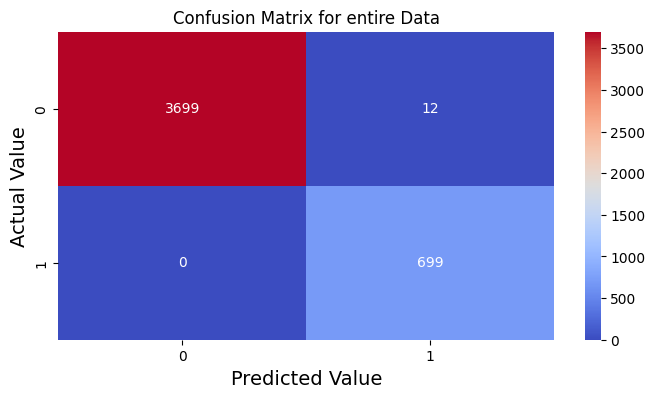

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
cm1 = confusion_matrix(x_entire_data,y)

plt.figure(figsize=(8,4))
plt.title('Confusion Matrix for entire Data', fontsize=12)
sns.heatmap(cm1, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel('Predicted Value', fontsize=14)
plt.ylabel('Actual Value', fontsize=14)

# Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cv_scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)


print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation scores: ", np.std(cv_scores))

pipe.fit(X_train, y_train)

test_score = pipe.score(X_test, y_test)
print("Test set accuracy: ", test_score)

Cross-validation scores:  [0.98866856 0.99150142 0.98866856 0.98866856 0.98300283 0.98866856
 0.99150142 0.98583569 0.98579545 0.98011364]
Mean cross-validation score:  0.9872424671645635
Standard deviation of cross-validation scores:  0.003424613704250983
Test set accuracy:  0.9863945578231292


# All Models with Pipeline

In [33]:
clfs={
    'Logistic_Regression':LogisticRegression(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'ExtraTreeClassifier':ExtraTreesClassifier(),
    'XGB':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'KNN':KNeighborsClassifier()
}

In [34]:
result=[]
for key,clf in clfs.items():
    pipe=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('clf',clf)
])
    pipe.fit(X_train,y_train)
    accuracy=accuracy_score(pipe.predict(X_test),y_test)
    precision=precision_score(pipe.predict(X_test),y_test)
    recall=recall_score(pipe.predict(X_test),y_test)
    f1=f1_score(pipe.predict(X_test),y_test)
    result.append([key,accuracy,precision,recall,f1])
    

In [35]:
results=pd.DataFrame(result,columns=['clf','accuracy','precision','recall','f1-score'])

In [36]:
results.sort_values(by='accuracy',ascending=False)

,clf,accuracy,precision,recall,f1-score
3,RandomForest,0.986395,0.939189,0.978873,0.958621
4,ExtraTreeClassifier,0.986395,0.918919,1.000000,0.957746
5,XGB,0.985261,0.932432,0.978723,0.955017
2,DecisionTree,0.981859,0.972973,0.923077,0.947368
1,SVC,0.886621,0.364865,0.900000,0.519231
6,AdaBoost,0.846939,0.243243,0.610169,0.347826
0,Logistic_Regression,0.835601,0.114865,0.548387,0.189944
7,KNN,0.815193,0.304054,0.428571,0.355731


# Cross Validating all Models with Pipeline

In [37]:
result_with_cv=[]
for key,clf in clfs.items():
    pipe=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('clf',clf)
])
    pipe.fit(X_train,y_train)
    accuracy=accuracy_score(pipe.predict(X_test),y_test)
    precision=precision_score(pipe.predict(X_test),y_test)
    recall=recall_score(pipe.predict(X_test),y_test)
    f1=f1_score(pipe.predict(X_test),y_test)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    pipe.fit(X_train, y_train)

    test_score =  np.mean(cv_scores)
    result_with_cv.append([key,accuracy,precision,recall,f1,test_score])
    

In [38]:
results_with_cv_df=pd.DataFrame(result_with_cv,columns=['clf','accuracy','precision','recall','f1-score','Mean-cv-score'])

In [39]:
results_with_cv_df.sort_values(by='accuracy',ascending=False)

,clf,accuracy,precision,recall,f1-score,Mean-cv-score
4,ExtraTreeClassifier,0.986395,0.918919,1.000000,0.957746,0.981009
2,DecisionTree,0.985261,0.972973,0.941176,0.956811,0.967689
5,XGB,0.985261,0.932432,0.978723,0.955017,0.978175
3,RandomForest,0.979592,0.918919,0.957746,0.937931,0.980725
1,SVC,0.886621,0.364865,0.900000,0.519231,0.899942
6,AdaBoost,0.846939,0.243243,0.610169,0.347826,0.861400
0,Logistic_Regression,0.835601,0.114865,0.548387,0.189944,0.852610
7,KNN,0.815193,0.304054,0.428571,0.355731,0.839281


<div class="alert alert-block alert-info" style="color:#942392;font-size: 20px;"> 📌 For our Problem statement recall is very much important, Extra Tree Classifier and Random Forest Classifier are performing very well in terms of recall. So we can Further tune and save our Model using pickle.📌</div>

<div class="alert alert-block alert-info" style="font-size: 25px;"> 📌 If you found this helpful then please upvote ⬆⬆ it and share your thoughts in the comment section. Thank you for reading this Notebook.📌</div>